<a href="https://colab.research.google.com/github/fidanfatih/Pycoders_Capstone/blob/main/Pycoders_AutoScout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
    ** In this notebook, We will make EDA in 3 stages.**

    . Part-1 : Data Cleansing. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns
    
    . Part-2 : Filling Columns. It deals with Missing Values. Categorical to numeric transformation will be done.

    . Part-3 : Outliers and Final review 

## Import Libraries and Data

In [345]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [346]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [347]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [348]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AutoScout24/autoscout_data_manuplated.csv')
df = data.copy()
df.shape

(65841, 46)

## Check Data

In [349]:
df.head(2)

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,"WAGENINGEN, NL",https://www.autoscout24.com/offers/audi-a1-1-4...,"\n,Audi ,\n","\n,A1,\n",1.4 TFSI 122 pk Pro Line S-Line 1 eigenaar/ NL...,"[['\n', '€ 15,945.-', '\n']]","['', ['42,091 km']]","\n,Automatic,\n",05/2012,"\n,Gasoline,\n","90 kW (122 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n4,\n3,"Country version,None",\n82-XDG-9,"\n,None,\n","[['\n'], ['']]",05/2012,None,03/2022,None,"\n,Yes,\n","\n,None,\n","\n,90 kW (122 hp),\n","\n,Automatic,\n","\n,1,390 cc,\n","\n,7,\n","\n,4,\n","\n,1,100 kg,\n","\n,Super 95,\n","['\n', ['5.3 l/100 km (comb.)', '6.5 l/100 km ...","\n,122 g/km (comb.),\n","\n,Euro 5,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Digital radio', 'MP3', 'On-boa...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (18"")', 'Sport seats', 'Sport ...","\n4, Red",None,"\npaint, Metallic","\nupholstery, Black","\n8, Part leather"
1,"BREUKELEN, NL",https://www.autoscout24.com/offers/audi-a3-spo...,"\n,Audi ,\n","\n,A3,\n",Sportback 1.0 TFSI ultra S tronic sport Lease ...,"[['\n', '€ 19,490.-', '\n']]","['', ['133,585 km']]","\n,Automatic,\n",05/2017,"\n,Gasoline,\n","85 kW (116 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n5,"Country version,None",\nNV922G,"\n,6 months,\n","[['\n'], ['']]",05/2017,None,None,None,"\n,None,\n","\n,None,\n","\n,85 kW (116 hp),\n","\n,Automatic,\n","\n,999 cc,\n","\n,None,\n","\n,None,\n","\n,1,175 kg,\n","\n,Gasoline,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 6,\n","[['Air conditioning', 'Armrest', 'Cruise contr...","[['CD player', 'On-board computer', 'Radio']]","[['ABS', 'Central door lock', 'Central door lo...","[['Alloy wheels', 'Sport suspension']]","\n4, Blue",None,None,"\nupholstery, Black","\n8, Cloth"


In [350]:
df = df.replace("None",np.nan)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65841 entries, 0 to 65840
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 65841 non-null  object 
 1   url                      65841 non-null  object 
 2   make                     65841 non-null  object 
 3   model                    65841 non-null  object 
 4   short_description        65732 non-null  object 
 5   price                    65841 non-null  object 
 6   mileage                  65841 non-null  object 
 7   gearbox                  65841 non-null  object 
 8   registration             65795 non-null  object 
 9   fuel_type                65841 non-null  object 
 10  power                    65841 non-null  object 
 11  seller                   65841 non-null  object 
 12  body_type                65841 non-null  object 
 13  type                     65841 non-null  object 
 14  drivetrain            

In [352]:
df.columns

Index(['location', 'url', 'make', 'model', 'short_description', 'price',
       'mileage', 'gearbox', 'registration', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version',
       'offer_number', 'warranty', 'Mileage', 'first_registration',
       'production_date', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'Power', 'Gearbox',
       'engine_size', 'gears', 'cylinders', 'empty_weight', 'Fuel_type',
       'fuel_consumption', 'co2_emissions', 'emission_class',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n',
       '\nSafety & Security\n', 'extras', '\ncolour', '\nmanufacturer_color',
       '\npaint', ' upholstery_colour ', ' upholstery '],
      dtype='object')

In [353]:
print(*df.columns,sep='\n')

location
url
make
model
short_description
price
mileage
gearbox
registration
fuel_type
power
seller
body_type
type
drivetrain
seats
doors
country_version
offer_number
warranty
Mileage
first_registration
production_date
general_inspection
last_service
full_service_history
non_smoker_vehicle
Power
Gearbox
engine_size
gears
cylinders
empty_weight
Fuel_type
fuel_consumption
co2_emissions
emission_class

Comfort & Convenience


Entertainment & Media


Safety & Security

extras

colour

manufacturer_color

paint
 upholstery_colour 
 upholstery 


In [354]:
df.isnull().sum()

location                         0
url                              0
make                             0
model                            0
short_description              109
price                            0
mileage                          0
gearbox                          0
registration                    46
fuel_type                        0
power                            0
seller                           0
body_type                        0
type                             0
drivetrain                       0
seats                            0
doors                            0
country_version                  0
offer_number                     0
warranty                         0
Mileage                          0
first_registration              45
production_date              58910
general_inspection           15730
last_service                 65841
full_service_history             0
non_smoker_vehicle               0
Power                            0
Gearbox             

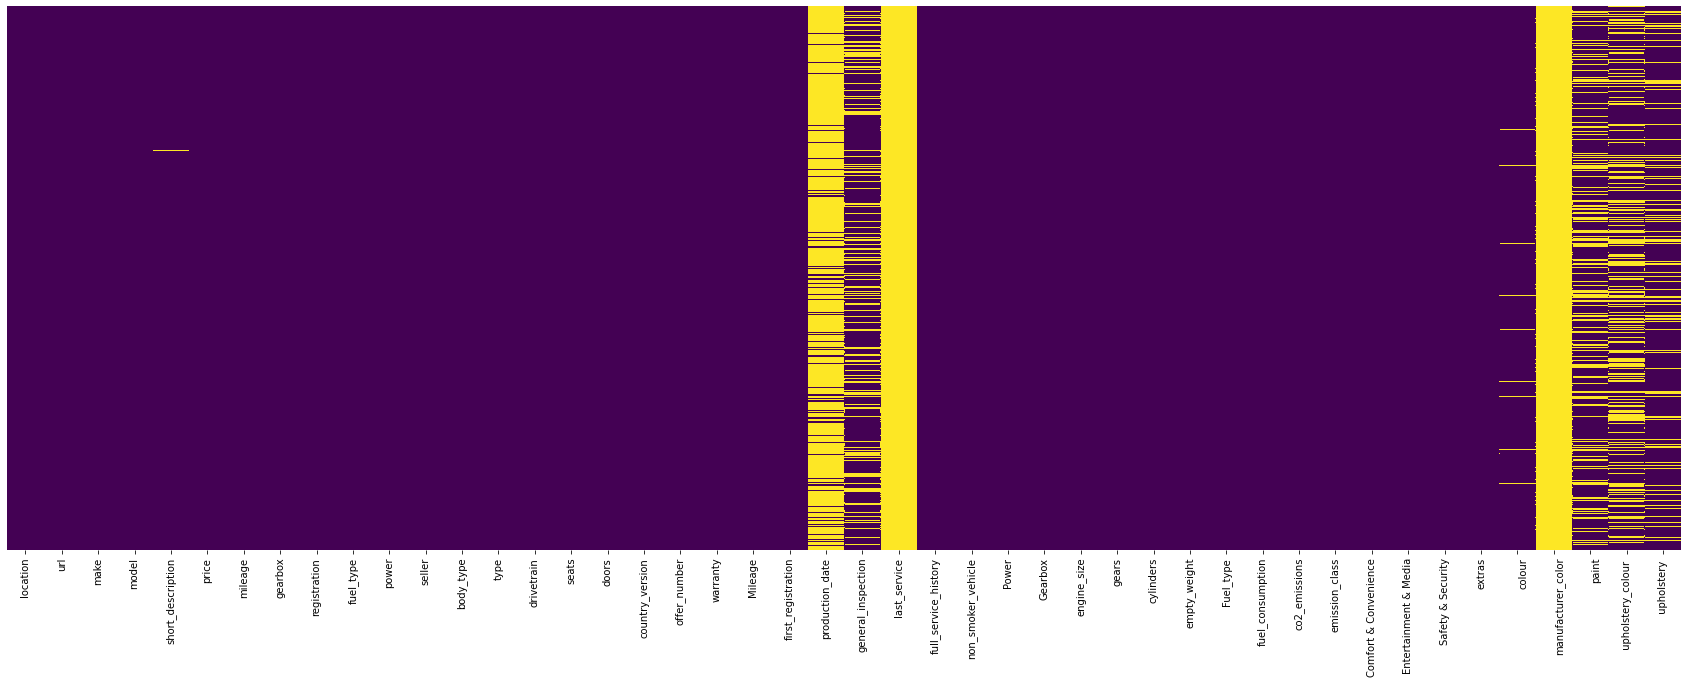

In [355]:
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [356]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x >= limit]

def perc_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()/serial.shape[0]*100

In [357]:
show_nans(df,0)

location                       0.000000
url                            0.000000
make                           0.000000
model                          0.000000
short_description              0.165550
price                          0.000000
mileage                        0.000000
gearbox                        0.000000
registration                   0.069865
fuel_type                      0.000000
power                          0.000000
seller                         0.000000
body_type                      0.000000
type                           0.000000
drivetrain                     0.000000
seats                          0.000000
doors                          0.000000
country_version                0.000000
offer_number                   0.000000
warranty                       0.000000
Mileage                        0.000000
first_registration             0.068346
production_date               89.473125
general_inspection            23.890889
last_service                 100.000000


In [358]:
df.head(1)

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,"WAGENINGEN, NL",https://www.autoscout24.com/offers/audi-a1-1-4...,"\n,Audi ,\n","\n,A1,\n",1.4 TFSI 122 pk Pro Line S-Line 1 eigenaar/ NL...,"[['\n', '€ 15,945.-', '\n']]","['', ['42,091 km']]","\n,Automatic,\n",05/2012,"\n,Gasoline,\n","90 kW (122 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n4,\n3,"Country version,None",\n82-XDG-9,"\n,None,\n","[['\n'], ['']]",05/2012,NaN,03/2022,NaN,"\n,Yes,\n","\n,None,\n","\n,90 kW (122 hp),\n","\n,Automatic,\n","\n,1,390 cc,\n","\n,7,\n","\n,4,\n","\n,1,100 kg,\n","\n,Super 95,\n","['\n', ['5.3 l/100 km (comb.)', '6.5 l/100 km ...","\n,122 g/km (comb.),\n","\n,Euro 5,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Digital radio', 'MP3', 'On-boa...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (18"")', 'Sport seats', 'Sport ...","\n4, Red",NaN,"\npaint, Metallic","\nupholstery, Black","\n8, Part leather"


> Drop columns that have %65 precentage and higher of missing values.

In [359]:
drop_columns=[
              # 'location', 
              'url', # useless
              # 'make', 
              # 'model', 
              'short_description', # complicated data ---------------------->
              # 'price',
              # 'mileage', 
              # 'gearbox', 
              # 'registration', 
              # 'fuel_type', 
              # 'power', 
              # 'seller',
              # 'body_type', 
              # 'type', 
              # 'drivetrain', 
              # 'seats', 
              # 'doors', 
              'country_version', # useless
              'offer_number', # useless
              # 'warranty', 
              'Mileage', # useless
              # 'first_registration',
              'production_date', # null
              # 'general_inspection', 
              'last_service', #null
              # 'full_service_history', 
              # 'non_smoker_vehicle', 
              'Power', # dublicate column
              'Gearbox', # dublicate column
              # 'engine_size', 
              # 'gears', 
              # 'cylinders', 
              # 'empty_weight', 
              'Fuel_type',# dublicate column
              # 'fuel_consumption', 
              # 'co2_emissions', 
              # 'emission_class',
              # '\nComfort & Convenience\n', 
              # '\nEntertainment & Media\n',
              # '\nSafety & Security\n',
              # 'extras', 
              # '\ncolour', # dublicate column
              '\nmanufacturer_color', # null
              # '\npaint',
              # ' upholstery_colour ',
              # ' upholstery ',
]
df.drop(drop_columns, axis = 1, inplace = True)

In [360]:
df.shape

(65841, 35)

## Percentages of Null Data

In [361]:
show_nans(df,0)

location                      0.000000
make                          0.000000
model                         0.000000
price                         0.000000
mileage                       0.000000
gearbox                       0.000000
registration                  0.069865
fuel_type                     0.000000
power                         0.000000
seller                        0.000000
body_type                     0.000000
type                          0.000000
drivetrain                    0.000000
seats                         0.000000
doors                         0.000000
warranty                      0.000000
first_registration            0.068346
general_inspection           23.890889
full_service_history          0.000000
non_smoker_vehicle            0.000000
engine_size                   0.000000
gears                         0.000000
cylinders                     0.000000
empty_weight                  0.000000
fuel_consumption              0.000000
co2_emissions            

\> At the begining, focus on the columns that have %15 precentage and higher of missing values. 

In [362]:
show_nans(df,15)

general_inspection     23.890889
\npaint                28.164821
 upholstery_colour     33.530779
 upholstery            15.999149
dtype: float64

## Rename Columns

In [363]:
df.columns

Index(['location', 'make', 'model', 'price', 'mileage', 'gearbox',
       'registration', 'fuel_type', 'power', 'seller', 'body_type', 'type',
       'drivetrain', 'seats', 'doors', 'warranty', 'first_registration',
       'general_inspection', 'full_service_history', 'non_smoker_vehicle',
       'engine_size', 'gears', 'cylinders', 'empty_weight', 'fuel_consumption',
       'co2_emissions', 'emission_class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nSafety & Security\n', 'extras',
       '\ncolour', '\npaint', ' upholstery_colour ', ' upholstery '],
      dtype='object')

In [364]:
df.rename(columns={
                  "\nComfort & Convenience\n":"comfort_convenience",
                  "\nEntertainment & Media\n":"entertainment_media",
                  "\nSafety & Security\n":"safety_security",
                  "\ncolour":"colour",
                  "\nmanufacturer_color":"manufacturer_color",
                  "\npaint":"paint",
                  " upholstery_colour ":"upholstery_colour",
                  " upholstery ":"upholstery" },inplace=True)

# 1-Data Cleansing

> Open a header for all columns

## location

In [365]:
perc_nans(df.location)

0.0

In [366]:
df.location.value_counts(dropna=False)

ROTTERDAM, NL                1431
APELDOORN, NL                1176
AMSTERDAM, NL                 959
TILBURG, NL                   906
HAARLEM, NL                   736
                             ... 
Driebergen-Rijsenburg, NL       1
Wolphaartsdijk, NL              1
FERWERT, NL                     1
heerlen, NL                     1
Gulpen-Wittem, NL               1
Name: location, Length: 2288, dtype: int64

In [367]:
df.location = df.location.str.strip(", NL")
df.location = df.location.str.title()

## make

In [368]:
perc_nans(df.make)

0.0

In [369]:
df.make.value_counts(dropna=False)

\n,BMW ,\n              7775
\n,Volkswagen ,\n       7344
\n,Audi ,\n             6344
\n,Mercedes-Benz ,\n    5580
\n,Volvo ,\n            5184
\n,Renault ,\n          4839
\n,Peugeot ,\n          3869
\n,Toyota ,\n           3026
\n,Skoda ,\n            2911
\n,Kia ,\n              2894
\n,Hyundai ,\n          2631
\n,Opel ,\n             2574
\n,Citroen ,\n          2473
\n,Mazda ,\n            2324
\n,Fiat ,\n             2195
\n,Honda ,\n            1045
\n,Ford ,\n              971
\n,Dacia ,\n             937
\n,Chevrolet ,\n         465
\n,Tesla ,\n             460
Name: make, dtype: int64

In [370]:
df.make = df.make.str.split(",").apply(lambda x: x[1])

In [371]:
df.make.value_counts(dropna=False)

BMW               7775
Volkswagen        7344
Audi              6344
Mercedes-Benz     5580
Volvo             5184
Renault           4839
Peugeot           3869
Toyota            3026
Skoda             2911
Kia               2894
Hyundai           2631
Opel              2574
Citroen           2473
Mazda             2324
Fiat              2195
Honda             1045
Ford               971
Dacia              937
Chevrolet          465
Tesla              460
Name: make, dtype: int64

## model

In [372]:
perc_nans(df.model)

0.0

In [373]:
df.model

0         \n,A1,\n
1         \n,A3,\n
2         \n,A3,\n
3         \n,A7,\n
4         \n,A3,\n
           ...    
65836    \n,S60,\n
65837    \n,S60,\n
65838    \n,S40,\n
65839    \n,S60,\n
65840    \n,S60,\n
Name: model, Length: 65841, dtype: object

In [374]:
df.model.value_counts(dropna=False)

\n,A3,\n           1349
\n,Golf,\n         1025
\n,Megane,\n        968
\n,A4,\n            857
\n,2008,\n          851
                   ... 
\n,Speedster,\n       1
\n,S1,\n              1
\n,425,\n             1
\n,ML 400,\n          1
\n,QUATTRO,\n         1
Name: model, Length: 694, dtype: int64

In [375]:
df.model = df.model.str.split(",").apply(lambda x: x[1])

In [376]:
df.model.value_counts(dropna=False)

A3           1349
Golf         1025
Megane        968
A4            857
2008          851
             ... 
Sienna          1
T5 Kombi        1
GL 63 AMG       1
GLK 300         1
LT              1
Name: model, Length: 694, dtype: int64

In [377]:
df['make_model'] = df[['make','model']].apply(lambda x: x[0].strip()+' '+x[1].strip(), axis=1)
df.make_model.value_counts(dropna=False)

Audi A3                  1349
Volkswagen Golf          1025
Renault Megane            968
Audi A4                   857
Peugeot 2008              851
                         ... 
Mercedes-Benz 500           1
Mercedes-Benz SLK 320       1
Chevrolet Trailblazer       1
Mercedes-Benz CL 600        1
Mercedes-Benz 300           1
Name: make_model, Length: 716, dtype: int64

In [378]:
df = df.drop(['make','model'], axis=1)

## price

> Target Column

In [379]:
perc_nans(df.price)

0.0

In [380]:
df.price.value_counts(dropna=False).sample(10)

[['\n', '€ 44,970.-', '\n']]     1
[['\n', '€ 24,244.-', '\n']]     1
[['\n', '€ 7,599.-', '\n']]      1
[['\n', '€ 86,470.-', '\n']]     1
[['\n', '€ 40,740.-', '\n']]     1
[['\n', '€ 19,949.-', '\n']]    16
[['\n', '€ 93,950.-', '\n']]     2
[['\n', '€ 28,930.-', '\n']]     6
[['\n', '€ 51,897.-', '\n']]     3
[['\n', '€ 7,990.-', '\n']]     26
Name: price, dtype: int64

In [381]:
df.price = df.price.str.extract('€ (\d*\,*\d*).-')[0].str.replace(",",'').astype('float')
df.price

0        15945.0
1        19490.0
2        19900.0
3        19800.0
4         5950.0
          ...   
65836     2495.0
65837     8950.0
65838     9250.0
65839     1999.0
65840     3950.0
Name: price, Length: 65841, dtype: float64

In [382]:
perc_nans(df.price)

2.2372078188362874

In [383]:
df = df.iloc[df[df.price.notna()==True].index,:]

In [384]:
perc_nans(df.price)

0.0

## mileage

In [385]:
perc_nans(df.mileage)

0.0

In [386]:
# df.mileage.sample(10)
df.mileage

0         ['', ['42,091 km']]
1        ['', ['133,585 km']]
2         ['', ['66,352 km']]
3        ['', ['156,201 km']]
4        ['', ['176,370 km']]
                 ...         
65836    ['', ['413,529 km']]
65837    ['', ['126,181 km']]
65838    ['', ['155,300 km']]
65839    ['', ['442,713 km']]
65840    ['', ['251,723 km']]
Name: mileage, Length: 64368, dtype: object

In [387]:
df.mileage = df.mileage.str.extract('(\d*),(\d*) km').apply(lambda x: x[0]+x[1], axis=1).astype('float')

In [388]:
df.mileage

0         42091.0
1        133585.0
2         66352.0
3        156201.0
4        176370.0
           ...   
65836    413529.0
65837    126181.0
65838    155300.0
65839    442713.0
65840    251723.0
Name: mileage, Length: 64368, dtype: float64

In [389]:
perc_nans(df.mileage)

9.778150633855331

## gearbox

In [390]:
df.gearbox.sample(10)

40497       \n,Manual,\n
31479    \n,Automatic,\n
39266       \n,Manual,\n
45793       \n,Manual,\n
16333       \n,Manual,\n
25539       \n,Manual,\n
11543    \n,Automatic,\n
1748     \n,Automatic,\n
57032    \n,Automatic,\n
41612       \n,Manual,\n
Name: gearbox, dtype: object

In [391]:
df.gearbox = df.gearbox.str.extract(',(\w*),')

In [392]:
df.gearbox.value_counts(dropna=False)

Automatic    38790
Manual       24895
NaN            683
Name: gearbox, dtype: int64

In [393]:
perc_nans(df.gearbox)

1.061086254039274

## first_registration

In [394]:
perc_nans(df.first_registration)

0.06991051454138703

In [395]:
df.first_registration

0        05/2012
1        05/2017
2        07/2016
3        01/2011
4        04/2005
          ...   
65836    06/2005
65837    03/2005
65838    06/2012
65839    02/2005
65840    10/2005
Name: first_registration, Length: 64368, dtype: object

In [396]:
df.first_registration = df.first_registration.str.extract('/(\d*)').astype('float')

In [397]:
df['age']= 2022 - df.first_registration

In [398]:
df.age.value_counts(dropna=False)

 1.0     9099
 5.0     6107
 6.0     5671
 4.0     4655
 2.0     4387
 7.0     3776
 3.0     3389
 11.0    3285
 10.0    3256
 8.0     3135
 9.0     3133
 12.0    2876
 14.0    2331
 13.0    2288
 15.0    1978
 16.0    1706
 17.0    1596
 0.0     1549
 NaN       45
 18.0      21
 19.0      16
 20.0      14
 21.0      13
 22.0       8
 25.0       6
 23.0       6
 26.0       4
 29.0       3
 24.0       3
 27.0       2
 30.0       2
 37.0       1
 28.0       1
 46.0       1
-6.0        1
-3.0        1
 41.0       1
 39.0       1
 31.0       1
Name: age, dtype: int64

## registration

In [399]:
data[data['first_registration']!=data['registration']][['first_registration','registration','power','empty_weight']]

,first_registration,registration,power,empty_weight
12810,None,NaN,"240 kW (326 hp),","\n,2,340 kg,\n"
12888,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
12908,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
12909,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
12911,None,NaN,"210 kW (286 hp),","\n,2,185 kg,\n"
14671,None,NaN,"552 kW (751 hp),","\n,None,\n"
14800,None,NaN,"291 kW (396 hp),","\n,None,\n"
14810,None,NaN,"570 kW (775 hp),","\n,None,\n"
14811,None,NaN,"441 kW (600 hp),","\n,2,585 kg,\n"
14812,None,NaN,"570 kW (775 hp),","\n,None,\n"


In [400]:
shifted_rows=[29016,37232,37515,37579,38283,38289,58169,58171]
data.iloc[shifted_rows]

,location,url,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
29016,"KERKRADE, NL",https://www.autoscout24.com/offers/volkswagen-...,"\n,Volkswagen ,\n","['\n', None, '\n']",Caddy 1.6 TDI Airco Trekhaak,"[['\n', '€ 6,950.-', '\n']]","['', ['152,938 km']]","\n,03/2014,\n",75 kW (102 hp),"\n,Manual,\n","2,159 kg,","['\n', ['Diesel\n']]","\n,Panel van,\n","\n,Used,\n","\n,Front,\n",\n2,\n4,"Country version,None",\nVLB16G,"\n,None,\n","[['\n'], ['']]",03/2014,None,New,None,"\n,None,\n","\n,None,\n","\n,75 kW (102 hp),\n","\n,Manual,\n","\n,1,598 cc,\n","\n,5,\n","\n,4,\n","\n,None,\n","\n,Diesel,\n","['\n', ['5.7 l/100 km (comb.)', '6.6 l/100 km ...","\n,149 g/km (comb.),\n","\n,Euro 5,\n","[['Air conditioning', 'Electrical side mirrors...",[['On-board computer']],"[['ABS', 'Central door lock', 'Driver-side air...",[['Trailer hitch']],"\n4, Red",None,None,"\nupholstery, Grey","\n8, Other"
37232,"GRONINGEN, NL",https://www.autoscout24.com/offers/citroen-jum...,"\n,Citroen ,\n","['\n', None, '\n']",Jumpy bestel 2.0 BlueHDI 180 M Driver | 19'' L...,"[['\n', '€ 28,989.-', '\n']]","['', ['4,997 km']]","\n,09/2021,\n",130 kW (177 hp),"\n,Automatic,\n","2,735 kg,","['\n', ['Diesel\n']]","\n,Panel van,\n","\n,Used,\n","\n,Front,\n",\n2,\n5,"Country version,Netherlands",\nVLL62P,"\n,6 months,\n","[['\n'], ['']]",09/2021,None,New,None,"\n,Yes,\n","\n,None,\n","\n,130 kW (177 hp),\n","\n,Automatic,\n","\n,1,997 cc,\n","\n,None,\n","\n,4,\n","\n,None,\n","\n,Diesel,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 6,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Android Auto', 'Apple CarPlay', 'Digital ra...","[['ABS', 'Adaptive Cruise Control', 'Alarm sys...","[['Alloy wheels (17"")', 'Trailer hitch', 'Voic...","\n4, Grey",None,"\npaint, Metallic",None,None
37515,"GRONINGEN, NL",https://www.autoscout24.com/offers/citroen-jum...,"\n,Citroen ,\n","['\n', None, '\n']",Jumpy bestel 2.0 BlueHDI 180 M Driver | 19'' L...,"[['\n', '€ 28,989.-', '\n']]","['', ['4,997 km']]","\n,09/2021,\n",130 kW (177 hp),"\n,Automatic,\n","2,735 kg,","['\n', ['Diesel\n']]","\n,Panel van,\n","\n,Used,\n","\n,Front,\n",\n2,\n5,"Country version,Netherlands",\nVLL62P,"\n,6 months,\n","[['\n'], ['']]",09/2021,None,New,None,"\n,Yes,\n","\n,None,\n","\n,130 kW (177 hp),\n","\n,Automatic,\n","\n,1,997 cc,\n","\n,None,\n","\n,4,\n","\n,None,\n","\n,Diesel,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 6,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Android Auto', 'Apple CarPlay', 'Digital ra...","[['ABS', 'Adaptive Cruise Control', 'Alarm sys...","[['Alloy wheels (17"")', 'Trailer hitch', 'Voic...","\n4, Grey",None,"\npaint, Metallic",None,None
37579,"'T LOO OLDEBROEK, NL",https://www.autoscout24.com/offers/citroen-jum...,"\n,Citroen ,\n","['\n', None, '\n']",jumpy,"[['\n', '€ 17,500.-', '\n']]","['', ['59,000 km']]","\n,07/2017,\n",90 kW (122 hp),"\n,Manual,\n","1,588 kg,","['\n', ['Diesel\n']]","\n,Car transport,\n","\n,Used,\n","\n,Front,\n",\n3,\n4,"Country version,Netherlands",\n1,"\n,None,\n","[['\n'], ['']]",07/2017,2017,New,None,"\n,Yes,\n","\n,None,\n","\n,90 kW (122 hp),\n","\n,Manual,\n","\n,1,997 cc,\n","\n,6,\n","\n,4,\n","\n,None,\n","\n,Diesel,\n","\n,None,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Android Auto', 'Apple CarPlay', 'Bluetooth'...","[['ABS', 'Alarm system', 'Central door lock wi...","[['Alloy wheels', 'Touch screen', 'Trailer hit...","\n4, Red",None,"\npaint, M

In [401]:
df.loc[shifted_rows,['empty_weight']] = df.loc[shifted_rows,['power']]
df.loc[shifted_rows,['power']] = df.loc[shifted_rows,['registration']]

In [402]:
df = df.drop(['registration','first_registration'],axis=1)

## fuel_type

In [403]:
perc_nans(df.fuel_type)

0.0

In [404]:
df.fuel_type

0        \n,Gasoline,\n
1        \n,Gasoline,\n
2        \n,Gasoline,\n
3        \n,Gasoline,\n
4        \n,Gasoline,\n
              ...      
65836         \n,LPG,\n
65837         \n,LPG,\n
65838     \n,Ethanol,\n
65839         \n,LPG,\n
65840         \n,CNG,\n
Name: fuel_type, Length: 64368, dtype: object

In [405]:
df.fuel_type = df.fuel_type.str.split(",").apply(lambda x: x[1])

In [406]:
df.fuel_type.value_counts(dropna=False)

Gasoline             37191
Diesel               12343
Electric/Gasoline     8645
Electric              5185
LPG                    486
Electric/Diesel        292
CNG                    105
Hydrogen                88
Others                  11
Automatic                9
Ethanol                  9
 None                    2
Manual                   2
Name: fuel_type, dtype: int64

## power

1 kW = 1.359622 hp

In [407]:
perc_nans(df.power) 

0.012428535918468804

In [408]:
df.power

0         90 kW (122 hp),
1         85 kW (116 hp),
2        110 kW (150 hp),
3        221 kW (300 hp),
4        147 kW (200 hp),
               ...       
65836    103 kW (140 hp),
65837    104 kW (141 hp),
65838    107 kW (145 hp),
65839    103 kW (140 hp),
65840    103 kW (140 hp),
Name: power, Length: 64368, dtype: object

In [409]:
df.power = df.power.str.extract('(\d*) hp')

In [410]:
perc_nans(df.power)

8.856885408898831

In [411]:
df.columns

Index(['location', 'price', 'mileage', 'gearbox', 'fuel_type', 'power',
       'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors',
       'warranty', 'general_inspection', 'full_service_history',
       'non_smoker_vehicle', 'engine_size', 'gears', 'cylinders',
       'empty_weight', 'fuel_consumption', 'co2_emissions', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'safety_security',
       'extras', 'colour', 'paint', 'upholstery_colour', 'upholstery',
       'make_model', 'age'],
      dtype='object')

## seller

In [412]:
perc_nans(df.seller) 

0.0

In [413]:
df.seller.value_counts()

['\n', ['Dealer\n']]            59529
['\n', ['Private seller\n']]     4828
['\n', ['Gasoline\n']]              4
['\n', ['Diesel\n']]                4
['\n', ['Electric\n']]              3
Name: seller, dtype: int64

In [414]:
df.seller =df.seller.str.extract(' \W*(\w*)\\n*')

In [415]:
df.seller.value_counts()

Dealer      59529
Private      4828
Diesel          4
Gasoline        4
Electric        3
Name: seller, dtype: int64

## body_type

In [416]:
perc_nans(df.body_type)

0.0

In [417]:
df.body_type.value_counts(dropna=False)

\n,Off-Road/Pick-up,\n    17436
\n,Compact,\n             13909
\n,Station wagon,\n       11959
\n,Van,\n                  6756
\n,Sedan,\n                5652
\n,Convertible,\n          3045
\n,Transporter,\n          2229
\n,Coupe,\n                1945
\n,None,\n                  848
\n,Other,\n                 583
\n,Panel van,\n               3
\n,Flatbed van,\n             2
\n,Car transport,\n           1
Name: body_type, dtype: int64

In [418]:
df.body_type = df.body_type.apply(lambda x:x.split(',')[1])

In [419]:
df.body_type.value_counts(dropna=False)

Off-Road/Pick-up    17436
Compact             13909
Station wagon       11959
Van                  6756
Sedan                5652
Convertible          3045
Transporter          2229
Coupe                1945
None                  848
Other                 583
Panel van               3
Flatbed van             2
Car transport           1
Name: body_type, dtype: int64

## type

In [420]:
perc_nans(df.type)

0.0

In [421]:
df.type.value_counts(dropna=False)

\n,Used,\n                 56380
\n,New,\n                   4044
\n,Demonstration,\n         2029
\n,Pre-registered,\n        1066
\n,None,\n                   848
\n,Antique / Classic,\n        1
Name: type, dtype: int64

In [422]:
df.type = df.type.apply(lambda x:x.split(',')[1])

In [423]:
df.type.value_counts(dropna=False)

Used                 56380
New                   4044
Demonstration         2029
Pre-registered        1066
None                   848
Antique / Classic        1
Name: type, dtype: int64

## drivetrain

In [424]:
perc_nans(df.drivetrain)

0.0

In [425]:
df.drivetrain.sample(10)

21923    \n,Front,\n
64012    \n,Front,\n
18049      \n,4WD,\n
13242      \n,4WD,\n
23254    \n,Front,\n
17271    \n,Front,\n
63251    \n,Front,\n
53422     \n,None,\n
53036    \n,Front,\n
47194     \n,Rear,\n
Name: drivetrain, dtype: object

In [426]:
df.drivetrain = df.drivetrain.apply(lambda x:x.split(',')[1])

In [427]:
df.drivetrain.value_counts(dropna=False)

Front    34729
None     14588
4WD       7698
Rear      7353
Name: drivetrain, dtype: int64

In [428]:
df.columns

Index(['location', 'price', 'mileage', 'gearbox', 'fuel_type', 'power',
       'seller', 'body_type', 'type', 'drivetrain', 'seats', 'doors',
       'warranty', 'general_inspection', 'full_service_history',
       'non_smoker_vehicle', 'engine_size', 'gears', 'cylinders',
       'empty_weight', 'fuel_consumption', 'co2_emissions', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'safety_security',
       'extras', 'colour', 'paint', 'upholstery_colour', 'upholstery',
       'make_model', 'age'],
      dtype='object')

## seats

In [429]:
perc_nans(df.seats)

0.0

In [430]:
df.seats.unique()

array(['\n4', '\n5', 'None\n', '\n2', '\n6', '\n7', '\n3', '\n8', '\n9',
       '\n1'], dtype=object)

In [431]:
df.seats = df.seats.str.extract('(\d)')

In [432]:
df.seats.value_counts(dropna=False)

5      48302
4       6196
NaN     4940
7       1986
2       1718
3        853
6        259
8         57
9         54
1          3
Name: seats, dtype: int64

## doors

In [433]:
perc_nans(df.doors)

0.0

In [434]:
df.doors.sample(10)

27450    \n5
63575    \n5
41523    \n5
60269    \n5
184      \n5
45321    \n5
857      \n2
51438    \n5
36240    \n5
7972     \n2
Name: doors, dtype: object

In [435]:
df.doors = df.doors.str.extract('(\d)')

In [436]:
df.doors.value_counts(dropna=False)

5      47683
4       8631
2       4659
3       2272
NaN     1044
6         75
1          4
Name: doors, dtype: int64

## warranty

In [437]:
df.warranty.value_counts()

\n,None,\n         41751
\n,6 months,\n     17683
\n,3 months,\n      1767
\n,12 months,\n     1467
\n,24 months,\n     1142
\n,84 months,\n      252
\n,1 months,\n       232
\n,18 months,\n       34
\n,36 months,\n       15
\n,2 months,\n         8
\n,48 months,\n        7
\n,Yes,\n              3
\n,60 months,\n        2
\n,5 months,\n         1
\n,26 months,\n        1
\n,9 months,\n         1
\n,10 months,\n        1
\n,4 months,\n         1
Name: warranty, dtype: int64

In [438]:
df.warranty = df.warranty.replace('\n,Yes,\n','\n,1 months,\n')

In [439]:
df.warranty = df.warranty.str.extract(',(\d*) months')

In [440]:
df.warranty.value_counts(dropna=False)

NaN    41751
6      17683
3       1767
12      1467
24      1142
84       252
1        235
18        34
36        15
2          8
48         7
60         2
26         1
4          1
10         1
9          1
5          1
Name: warranty, dtype: int64

In [441]:
perc_nans(df.warranty)

64.86297539149888

## general_inspection

In [442]:
df.general_inspection.sample(20)

49214        NaN
38247    07/2022
56712        NaN
35397        NaN
22629    09/2022
57890    08/2022
34910    08/2024
7684     01/2024
60671        NaN
15510    01/2025
57750    03/2023
323      10/2022
47869        New
55332        New
54554        NaN
51776    03/2022
19266    09/2022
24576    11/2022
16044        New
20059        New
Name: general_inspection, dtype: object

In [443]:
df.general_inspection = df.general_inspection.replace('New','01/2022')
df.general_inspection = df.general_inspection.fillna('1/0')

In [444]:
df.general_inspection = df.general_inspection.str.split('/').apply(lambda x: (int(x[1]) - 2022) * 12 + int(x[0]) - 1)

In [445]:
df.general_inspection.value_counts(dropna=False).sort_index()

-24264    15462
-62           2
-61           1
-52           1
-50           1
-49           1
-48           1
-40           1
-39           1
-35           1
-34           1
-33           2
-31           2
-30           2
-28           1
-26           1
-25           1
-24           1
-23           1
-22           2
-19           4
-18           6
-17           1
-16           3
-15           4
-14           2
-13           7
-12           8
-11           3
-10          11
-9           12
-8           10
-7           11
-6           29
-5           26
-4           46
-3           57
-2          102
-1          132
 0        16833
 1         1567
 2         2006
 3         1708
 4         1890
 5         2169
 6         1916
 7         1604
 8         1746
 9         1794
 10        1826
 11        1508
 12         822
 13         490
 14         496
 15         482
 16         517
 17         530
 18         501
 19         420
 20         392
 21         432
 22         471
 23     

In [446]:
df.general_inspection = df['general_inspection'].where(df.general_inspection>=0)

In [449]:
df.general_inspection.value_counts(dropna=False).sort_index()

0.0     16833
1.0      1567
2.0      2006
3.0      1708
4.0      1890
5.0      2169
6.0      1916
7.0      1604
8.0      1746
9.0      1794
10.0     1826
11.0     1508
12.0      822
13.0      490
14.0      496
15.0      482
16.0      517
17.0      530
18.0      501
19.0      420
20.0      392
21.0      432
22.0      471
23.0      360
24.0      276
25.0      222
26.0      149
27.0       79
28.0      125
29.0      212
30.0      289
31.0      198
32.0      295
33.0      260
34.0      210
35.0      414
36.0      273
37.0      290
38.0      395
39.0      288
40.0      286
41.0      383
42.0      248
43.0      193
44.0      244
45.0      248
46.0      243
47.0       83
48.0        4
49.0        3
50.0        1
51.0        3
52.0        6
53.0        6
54.0        1
58.0        1
NaN     15960
Name: general_inspection, dtype: int64

## full_service_history

In [450]:
df.full_service_history.sample(20)

35494     \n,Yes,\n
26999     \n,Yes,\n
31081     \n,Yes,\n
11185    \n,None,\n
14265     \n,Yes,\n
65336    \n,None,\n
37103     \n,Yes,\n
27128     \n,Yes,\n
18500    \n,None,\n
62083     \n,Yes,\n
15121     \n,Yes,\n
39766    \n,None,\n
6585      \n,Yes,\n
55161     \n,Yes,\n
11992    \n,None,\n
24705     \n,Yes,\n
28821     \n,Yes,\n
37192     \n,Yes,\n
10334     \n,Yes,\n
55792    \n,None,\n
Name: full_service_history, dtype: object

In [451]:
df.full_service_history = df.full_service_history.str.extract(',(\w*),')

In [452]:
df.full_service_history.value_counts(dropna=False)

Yes     44955
None    19413
Name: full_service_history, dtype: int64

## non_smoker_vehicle

In [453]:
df.non_smoker_vehicle

0        \n,None,\n
1        \n,None,\n
2        \n,None,\n
3        \n,None,\n
4        \n,None,\n
            ...    
65836    \n,None,\n
65837    \n,None,\n
65838    \n,None,\n
65839    \n,None,\n
65840    \n,None,\n
Name: non_smoker_vehicle, Length: 64368, dtype: object

In [454]:
df.non_smoker_vehicle = df.non_smoker_vehicle.str.extract(',(\w*),')

In [455]:
df.non_smoker_vehicle.value_counts(dropna=False)

None    59393
Yes      4975
Name: non_smoker_vehicle, dtype: int64

## engine_size

In [456]:
df.engine_size

0        \n,1,390 cc,\n
1          \n,999 cc,\n
2        \n,1,395 cc,\n
3        \n,2,995 cc,\n
4        \n,1,984 cc,\n
              ...      
65836    \n,2,435 cc,\n
65837    \n,2,435 cc,\n
65838    \n,1,999 cc,\n
65839    \n,2,435 cc,\n
65840    \n,2,435 cc,\n
Name: engine_size, Length: 64368, dtype: object

In [457]:
df.engine_size = df.engine_size.str.extract('(\d,\d*)')

In [458]:
df.engine_size = df.engine_size.str.replace(',','').astype('float')

In [459]:
df.engine_size.value_counts(dropna=False)

NaN       10540
1598.0     5207
1998.0     2858
1395.0     2424
1969.0     2281
          ...  
2902.0        1
3190.0        1
2990.0        1
2264.0        1
3724.0        1
Name: engine_size, Length: 372, dtype: int64

In [460]:
df = df.rename(columns={"engine_size": "engine_size_cc"})

## gears

In [461]:
df.gears

0           \n,7,\n
1        \n,None,\n
2           \n,8,\n
3        \n,None,\n
4           \n,6,\n
            ...    
65836       \n,5,\n
65837       \n,5,\n
65838       \n,5,\n
65839       \n,5,\n
65840       \n,5,\n
Name: gears, Length: 64368, dtype: object

In [462]:
df.gears = df.gears.str.extract(',(\d),')

In [463]:
df.gears.value_counts(dropna=False)

6      19791
NaN    18234
5       9747
7       7689
8       5649
1       1610
9       1098
4        511
2         35
3          4
Name: gears, dtype: int64

## cylinders

In [464]:
 df.cylinders

0           \n,4,\n
1        \n,None,\n
2           \n,4,\n
3           \n,6,\n
4           \n,4,\n
            ...    
65836       \n,5,\n
65837       \n,5,\n
65838       \n,4,\n
65839       \n,5,\n
65840       \n,5,\n
Name: cylinders, Length: 64368, dtype: object

In [465]:
df.cylinders = df.cylinders.str.extract(',(\d),')

In [466]:
df.cylinders.value_counts(dropna=False)

4      43525
3       7986
NaN     5979
6       4049
5       1089
8        866
1        445
2        428
7          1
Name: cylinders, dtype: int64

## empty_weight

In [467]:
df.empty_weight

0        \n,1,100 kg,\n
1        \n,1,175 kg,\n
2        \n,1,210 kg,\n
3        \n,1,745 kg,\n
4            \n,None,\n
              ...      
65836    \n,1,496 kg,\n
65837    \n,1,475 kg,\n
65838    \n,1,260 kg,\n
65839    \n,1,441 kg,\n
65840    \n,1,489 kg,\n
Name: empty_weight, Length: 64368, dtype: object

In [468]:
df.empty_weight =df.empty_weight.str.extract('(\d,\d*)')

In [469]:
df.empty_weight = df.empty_weight.str.replace(',','').astype('float')

In [470]:
df.empty_weight.value_counts(dropna=False)

NaN       4611
1295.0    1509
1405.0    1327
1635.0     905
1515.0     713
          ... 
2602.0       1
1981.0       1
1796.0       1
2810.0       1
2394.0       1
Name: empty_weight, Length: 1339, dtype: int64

In [471]:
df = df.rename(columns={"empty_weight": "empty_weight_kg"})

## fuel_consumption

In [472]:
df.fuel_consumption

0        ['\n', ['5.3 l/100 km (comb.)', '6.5 l/100 km ...
1                                               \n,None,\n
2        ['\n', ['4.6 l/100 km (comb.)', '5.7 l/100 km ...
3        ['\n', ['8.2 l/100 km (comb.)', '10.8 l/100 km...
4         ['\n', ['7.7 l/100 km (comb.)', ' ', ' '], '\n']
                               ...                        
65836    ['\n', ['9.5 l/100 km (comb.)', '13.6 l/100 km...
65837    ['\n', ['9.5 l/100 km (comb.)', '13.8 l/100 km...
65838    ['\n', ['10.6 l/100 km (comb.)', '14.8 l/100 k...
65839                                           \n,None,\n
65840    ['\n', ['8.9 l/100 km (comb.)', '12.7 l/100 km...
Name: fuel_consumption, Length: 64368, dtype: object

In [473]:
df.fuel_consumption[0]

"['\\n', ['5.3 l/100 km (comb.)', '6.5 l/100 km (city)', '4.6 l/100 km (country)'], '\\n']"

In [474]:
df['fuel_consumption_mean'] = df.fuel_consumption.str.extract('(\d*\.\d*) l\/100 km \(comb').astype('float')

In [475]:
df['fuel_consumption_city'] = df.fuel_consumption.str.extract('(\d*\.\d*) l\/100 km \(city').astype('float')

In [476]:
df['fuel_consumption_country'] = df.fuel_consumption.str.extract('(\d*\.\d*) l\/100 km \(country').astype('float')

In [477]:
df = df.drop(['fuel_consumption'], axis=1)

## co2_emissions

In [478]:
df.co2_emissions

0               \n,122 g/km (comb.),\n
1        ['\n', [' ', ' ', ' '], '\n']
2               \n,106 g/km (comb.),\n
3               \n,190 g/km (comb.),\n
4                           \n,None,\n
                     ...              
65836           \n,226 g/km (comb.),\n
65837           \n,227 g/km (comb.),\n
65838           \n,174 g/km (comb.),\n
65839    ['\n', [' ', ' ', ' '], '\n']
65840           \n,159 g/km (comb.),\n
Name: co2_emissions, Length: 64368, dtype: object

In [479]:
df.co2_emissions= df.co2_emissions.str.extract(',(\d*)')

In [480]:
df.co2_emissions.value_counts(dropna=False)

       16625
0       5561
139     1147
119      954
149      881
       ...  
316        1
67         1
330        1
70         1
301        1
Name: co2_emissions, Length: 333, dtype: int64

In [481]:
df.loc[df[df.co2_emissions==''].index,'co2_emissions']=np.nan

## emission_class

In [482]:
df.emission_class

0        \n,Euro 5,\n
1        \n,Euro 6,\n
2        \n,Euro 6,\n
3        \n,Euro 5,\n
4          \n,None,\n
             ...     
65836    \n,Euro 4,\n
65837    \n,Euro 4,\n
65838    \n,Euro 5,\n
65839      \n,None,\n
65840      \n,None,\n
Name: emission_class, Length: 64368, dtype: object

In [483]:
df.emission_class = df.emission_class.str.extract(',(\w+\s*\d*)')

In [484]:
df.emission_class.value_counts(dropna=False)

None      22271
Euro 6    21922
Euro 5    11730
Euro 4     7038
NaN         532
Euro 1      475
Euro 3      391
Euro 2        9
Name: emission_class, dtype: int64

## comfort_convenience

In [485]:
df.comfort_convenience

0        [['Air conditioning', 'Armrest', 'Automatic cl...
1        [['Air conditioning', 'Armrest', 'Cruise contr...
2        [['Air conditioning', 'Armrest', 'Automatic cl...
3        [['Air conditioning', 'Automatic climate contr...
4        [['Air conditioning', 'Armrest', 'Automatic cl...
                               ...                        
65836    [['Air conditioning', 'Automatic climate contr...
65837    [['Air conditioning', 'Automatic climate contr...
65838    [['Air conditioning', 'Armrest', 'Automatic cl...
65839    [['Air conditioning', 'Automatic climate contr...
65840    [['Air conditioning', 'Automatic climate contr...
Name: comfort_convenience, Length: 64368, dtype: object

In [486]:
df.comfort_convenience = df.comfort_convenience.str.strip("[']").str.split("', '")

In [487]:
df.comfort_convenience

0        [Air conditioning, Armrest, Automatic climate ...
1        [Air conditioning, Armrest, Cruise control, El...
2        [Air conditioning, Armrest, Automatic climate ...
3        [Air conditioning, Automatic climate control, ...
4        [Air conditioning, Armrest, Automatic climate ...
                               ...                        
65836    [Air conditioning, Automatic climate control, ...
65837    [Air conditioning, Automatic climate control, ...
65838    [Air conditioning, Armrest, Automatic climate ...
65839    [Air conditioning, Automatic climate control, ...
65840    [Air conditioning, Automatic climate control, ...
Name: comfort_convenience, Length: 64368, dtype: object

## entertainment_media

In [488]:
df.entertainment_media

0        [['CD player', 'Digital radio', 'MP3', 'On-boa...
1            [['CD player', 'On-board computer', 'Radio']]
2        [['Bluetooth', 'Digital cockpit', 'Hands-free ...
3                                              [['Radio']]
4                                 [['CD player', 'Radio']]
                               ...                        
65836                              [['On-board computer']]
65837                     [['On-board computer', 'Radio']]
65838        [['CD player', 'On-board computer', 'Radio']]
65839        [['CD player', 'On-board computer', 'Radio']]
65840                                          [['Radio']]
Name: entertainment_media, Length: 64368, dtype: object

In [489]:
df.entertainment_media = df.entertainment_media.str.strip("[']").str.split("', '")

In [490]:
df.entertainment_media

0        [CD player, Digital radio, MP3, On-board compu...
1                    [CD player, On-board computer, Radio]
2        [Bluetooth, Digital cockpit, Hands-free equipm...
3                                                  [Radio]
4                                       [CD player, Radio]
                               ...                        
65836                                  [On-board computer]
65837                           [On-board computer, Radio]
65838                [CD player, On-board computer, Radio]
65839                [CD player, On-board computer, Radio]
65840                                              [Radio]
Name: entertainment_media, Length: 64368, dtype: object

## safety_security

In [491]:
df.safety_security

0        [['ABS', 'Alarm system', 'Bi-Xenon headlights'...
1        [['ABS', 'Central door lock', 'Central door lo...
2        [['ABS', 'Central door lock', 'Central door lo...
3        [['ABS', 'Alarm system', 'Bi-Xenon headlights'...
4        [['ABS', 'Central door lock', 'Central door lo...
                               ...                        
65836    [['ABS', 'Central door lock', 'Central door lo...
65837    [['ABS', 'Alarm system', 'Bi-Xenon headlights'...
65838    [['ABS', 'Alarm system', 'Central door lock', ...
65839    [['ABS', 'Central door lock', 'Central door lo...
65840    [['ABS', 'Alarm system', 'Central door lock', ...
Name: safety_security, Length: 64368, dtype: object

In [492]:
df.safety_security = df.safety_security.str.strip("[']").str.split("', '")

In [493]:
df.safety_security

0        [ABS, Alarm system, Bi-Xenon headlights, Centr...
1        [ABS, Central door lock, Central door lock wit...
2        [ABS, Central door lock, Central door lock wit...
3        [ABS, Alarm system, Bi-Xenon headlights, Centr...
4        [ABS, Central door lock, Central door lock wit...
                               ...                        
65836    [ABS, Central door lock, Central door lock wit...
65837    [ABS, Alarm system, Bi-Xenon headlights, Centr...
65838    [ABS, Alarm system, Central door lock, Central...
65839    [ABS, Central door lock, Central door lock wit...
65840    [ABS, Alarm system, Central door lock, Central...
Name: safety_security, Length: 64368, dtype: object

## extras

In [494]:
df.extras

0        [['Alloy wheels (18")', 'Sport seats', 'Sport ...
1                   [['Alloy wheels', 'Sport suspension']]
2        [['Alloy wheels (17")', 'Ambient lighting', 'E...
3        [['Alloy wheels (18")', 'Automatically dimming...
4        [['Alloy wheels (17")', 'Headlight washer syst...
                               ...                        
65836    [['Alloy wheels (15")', 'Automatically dimming...
65837    [['Automatically dimming interior mirror', 'Tr...
65838                             [['Alloy wheels (16")']]
65839                             [['Alloy wheels (15")']]
65840                             [['Alloy wheels (17")']]
Name: extras, Length: 64368, dtype: object

In [495]:
# df.extras.str.replace("'\'","").str.replace("\''","")

In [496]:
df.extras = df.extras.str.strip("[']").str.split("', '")

In [497]:
df.extras

0        [Alloy wheels (18"), Sport seats, Sport suspen...
1                         [Alloy wheels, Sport suspension]
2        [Alloy wheels (17"), Ambient lighting, Electro...
3        [Alloy wheels (18"), Automatically dimming int...
4        [Alloy wheels (17"), Headlight washer system, ...
                               ...                        
65836    [Alloy wheels (15"), Automatically dimming int...
65837    [Automatically dimming interior mirror, Traile...
65838                                 [Alloy wheels (16")]
65839                                 [Alloy wheels (15")]
65840                                 [Alloy wheels (17")]
Name: extras, Length: 64368, dtype: object

## colour

In [498]:
df.colour

0          \n4, Red
1         \n4, Blue
2         \n4, Grey
3        \n4, Brown
4         \n4, Blue
            ...    
65836    \n4, Black
65837     \n4, Blue
65838    \n4, Black
65839     \n4, Blue
65840     \n4, Blue
Name: colour, Length: 64368, dtype: object

In [499]:
df.colour = df.colour.str.extract('\n4, (\w*)')

In [500]:
df.colour.value_counts(dropna=False)

Grey      21036
Black     16661
White      9521
Blue       7744
Red        2963
Brown      1853
Silver     1568
NaN        1042
Green       655
Beige       505
Orange      337
Yellow      252
Violet      158
Gold         44
Bronze       29
Name: colour, dtype: int64

## paint

In [501]:
df.paint

0        \npaint, Metallic
1                      NaN
2        \npaint, Metallic
3                      NaN
4        \npaint, Metallic
               ...        
65836                  NaN
65837    \npaint, Metallic
65838    \npaint, Metallic
65839                  NaN
65840    \npaint, Metallic
Name: paint, Length: 64368, dtype: object

In [502]:
df.paint = df.paint.str.extract('(\w*)$')

In [503]:
df.paint.value_counts(dropna=False)

Metallic    46207
NaN         18161
Name: paint, dtype: int64

## upholstery_colour

In [504]:
df.upholstery_colour

0        \nupholstery, Black
1        \nupholstery, Black
2         \nupholstery, Grey
3                        NaN
4        \nupholstery, Black
                ...         
65836    \nupholstery, Black
65837    \nupholstery, Beige
65838    \nupholstery, Black
65839                    NaN
65840    \nupholstery, Beige
Name: upholstery_colour, Length: 64368, dtype: object

In [505]:
df.upholstery_colour=df.upholstery_colour.str.extract('(\w*)$')

In [506]:
df.upholstery_colour.value_counts(dropna=False)

Black     32062
NaN       21613
Grey       5323
Other      1690
Beige      1551
Brown      1250
White       299
Red         280
Blue        255
Orange       19
Yellow       18
Green         8
Name: upholstery_colour, dtype: int64

## upholstery

In [507]:
df.upholstery.value_counts(dropna=False)

\n8, Cloth           24225
\n8, Full leather    17947
NaN                  10330
\n8, Part leather     9889
\n8, alcantara        1116
\n8, Other             501
\n8, Velour            360
Name: upholstery, dtype: int64

In [508]:
df.upholstery= df.upholstery.str.strip('\n8, ')

In [509]:
df.upholstery.value_counts(dropna=False)

Cloth           24225
Full leather    17947
NaN             10330
Part leather     9889
alcantara        1116
Other             501
Velour            360
Name: upholstery, dtype: int64

# 2-Filling Columns

In [510]:
df.shape

(64368, 35)

In [511]:
show_nans(df,0)

location                     0.000000
price                        0.000000
mileage                      9.778151
gearbox                      1.061086
fuel_type                    0.000000
power                        8.856885
seller                       0.000000
body_type                    0.000000
type                         0.000000
drivetrain                   0.000000
seats                        7.674621
doors                        1.621924
warranty                    64.862975
general_inspection          24.794929
full_service_history         0.000000
non_smoker_vehicle           0.000000
engine_size_cc              16.374596
gears                       28.327740
cylinders                    9.288777
empty_weight_kg              7.163497
co2_emissions               25.828051
emission_class               0.826498
comfort_convenience          0.000000
entertainment_media          0.000000
safety_security              0.000000
extras                       0.000000
colour      

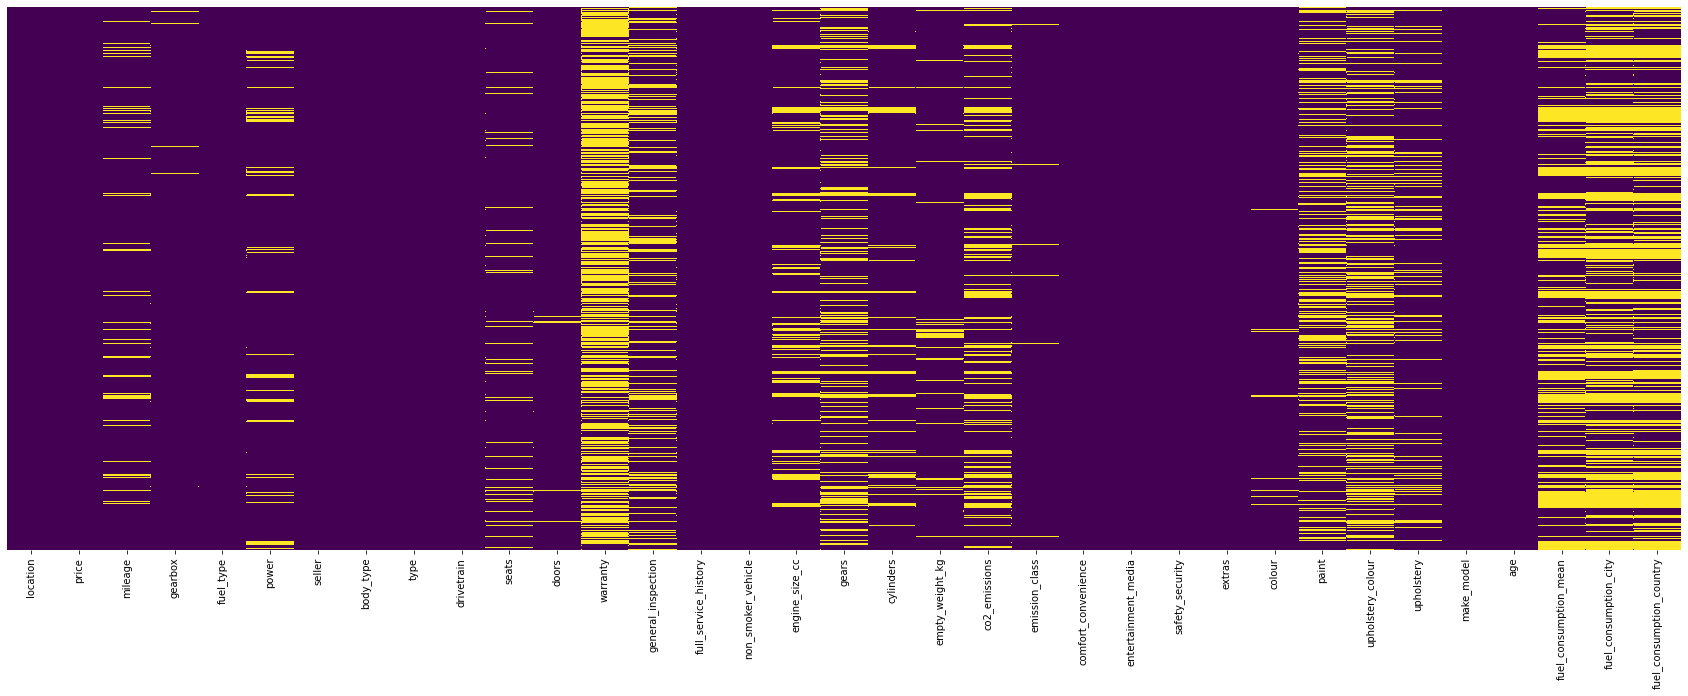

In [512]:
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

# 3-Outlier Analysis